# Initializations 

In [1]:
import wntr
import pandas as pd
import numpy as np
import scipy
import copy

from scripts.segmentNet import SegmentNet
from scripts.valves import ValveStates,create_valvestates

Num nodes: 353 ;Num links: 391


/home/rewu/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


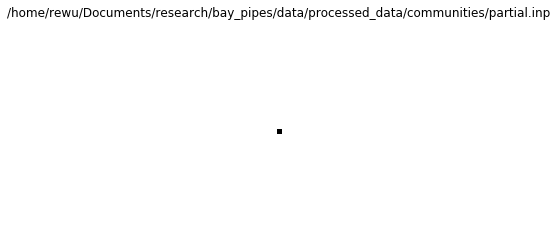

In [2]:
# Create a water network model
inp_file = '/home/rewu/Documents/research/bay_pipes/data/processed_data/communities/partial.inp'
wn = wntr.network.WaterNetworkModel(inp_file)
wntr.graphics.plot_network(wn, title=wn.name)
n_node = len(wn.node_name_list)
n_link = len(wn.link_name_list)
print ("Num nodes:",n_node ,";Num links:", n_link)

In [3]:
inp_graph = wntr.sim.graph.NetworkRepresentor(wn)

In [4]:
# def create_valves(lid2npair):
#     vid = 0
#     valves = []
#     for lid, npairs in lid2npair.items():
#         for nid in npairs:
#             v = Valve(vid,nid,lid)
#             vid += 1
#             valves.append(v)
#     return valves
        

# class ValveStates(object):
#     def __init__(self,valve_register,N1 = False):
#         self.vreg = copy.deepcopy(valve_register)
#         self.N1 = N1
#         self.topo_valves = self._adjust2N_1() 
#         self.valid_valves = self._init_valid_valves()
        
#         self.normal_valves = self._init_valid_valves()
#         self.failed_valves = []
# #         self.prev_state = None
        
#     def _adjust2N_1(self):
#         adjust_valves = []
#         if self.N1:
#             for nid, valves in self.vreg.nid2v.items():
#                 topo_valve = np.random.choice(valves, 1, replace=False)[0]
#                 topo_valve.keep_open = True
#                 topo_valve.fail = True
#                 adjust_valves.append(topo_valve)
#         return adjust_valves
    
#     def _init_valid_valves(self):
#         valid_valves = []
#         for vid, valve in self.vreg.vid2v.items():
#             if valve not in self.topo_valves:
#                 valid_valves.append(valve)
#         return valid_valves
    
#     def _fail_valve(self,vindex):
#         valve = self.normal_valves.pop(vindex)
#         valve.fail = True
#         return valve
    
#     def fail_valves(self,nv2fail):
# #         self.prev_state = copy.deepcopy(self)
#         failed_valves = []
#         for _ in range(nv2fail):
#             vidx_pool = list(range(len(self.normal_valves)))
#             vidx2fail = np.random.choice(vidx_pool,1,replace=False)[0]
#             failed_valve = self._fail_valve(vidx2fail)
#             failed_valves.append(failed_valve)
#         self.failed_valves += failed_valves
#         return failed_valves
    
# #     def roll_back(self):
# #         self.vreg = self.prev_state.vreg
# #         self.topo_valves = self.prev_state.topo_valves
# #         self.normal_valves = self.prev_state.normal_valves
# #         self.prev_state = self.prev_state.prev_state
        
#     def get_valve_dict(self):
#         return self.vreg.vid2v
    
# #     def fail_all_valid_valves(self):
# #         self.prev_state = copy.deepcopy(self)
# #         for valid_valve in self.valid_valves:
# #             valid_valve.fail = True
            
#     @property
#     def fail_rate(self):
#         return 1-len(self.normal_valves)/len(self.valid_valves)
    
    
# def create_valvestates(lid2npair,N1):
#     valves = create_valves(lid2npair)
#     vreg = ValveRegister()
#     vreg.register(valves)
#     vstates = ValveStates(vreg,N1)
#     return vstates



In [5]:
# class Segment(object):
#     def __init__(self, sid):
#         self.sid = sid
#         self.nids = []
#         self.pids = []
#         self.components = [sid]
        
#         self.risk = None
#         self.direct_cost = None
#         self.unintend_cost = None
       
#     def __str__(self):  
#         return "segment with sid %d, contains nid %s and pid %s, risk %f, direct_cost %f, unintend_cost %s  " % (
#             self.sid, str(self.nids),str(self.pids),self.risk, self.direct_cost,str(self.unintend_cost)  )
    
#     # merge two segments 
#     def __iadd__(self, seg1):
#         self.nids += seg1.nids
#         self.pids += seg1.pids
#         self.components += seg1.components
#         self.risk += seg1.risk
#         self.direct_cost += seg1.direct_cost
#         self.unintend_cost = None # undefined, need to be recomputed
#         return self
    
#     def adjust_risk(self,L):
#         self.risk = len(self.pids)/L
#         return True
    
#     def adjust_direct_cost(self):
#         self.direct_cost = len(self.pids)
        

        
        

# def create_segment_from_nullid(sid, component,num_nodes):    
#     seg = Segment(sid)
#     for element_id in component:
#         if element_id < num_nodes:
#             seg.nids.append(element_id)
#         else:
#             seg.pids.append(element_id-num_nodes)
#     return seg

# def find_segments(A, num_nodes):
#     segments = []
#     components = bfs(A)
#     for i, component in enumerate(components):
#         segment = create_segment_from_nullid(i, component,num_nodes)
#         segments.append(segment)
#     return segments

    
# def create_adj_mtx(vstates):
#     nnodes = len(vstates.vreg.nid2v)
#     npipes = len(vstates.vreg.pid2v)
#     vdict = vstates.get_valve_dict()
#     A = assemble_adjacency_mtx(nnodes, npipes, vdict)
#     return A
    
# def simulate_segments(vstates):
#     A = create_adj_mtx(vstates)
#     nnodes = len(vstates.vreg.nid2v)
#     segments = find_segments(A,nnodes)
#     return segments




In [6]:
# def bfs_tree(root,A):
#     nids_to_explore = [root]
#     component = []
#     edges = []
  
#     while len(nids_to_explore):
#         nid = nids_to_explore.pop()
#         if nid not in component:
#             if (len(component)):
#                 edges.append((component[-1],nid))
#             component.append(nid)
#         row = A[nid,:]
#         try:
#             linked_nids = np.nonzero(row)[1]
#         except:
#             linked_nids = np.nonzero(row)[0]
            
#         for linked_nid in linked_nids:
#             if linked_nid not in component:
#                 nids_to_explore.append(linked_nid)
#     return component,edges

    
    
# def bfs(A):
#     nids = set(range(A.shape[0]))
#     components = []
#     while len(nids):
#         bfs_root = nids.pop()
#         component, _ = bfs_tree(bfs_root,A)
#         nids -= set(component)
#         components.append(component)
#     return components


In [7]:
# def get_nid2seg_dict(segments):
#     nid2seg = {}
#     for seg in segments:
#         for nid in seg.nids:
#             nid2seg[nid] = seg
#     return nid2seg

# def get_pid2seg_dict(segments):
#     pid2seg = {}
#     for seg in segments:
#         for pid in seg.pids:
#             pid2seg[pid] = seg
#     return pid2seg
        

In [8]:
# class SegmentsInfo(object):
#     def __init__(self,vstates):
#         self.segments = simulate_segments(vstates)
#         self.sid2index = self._init_sid2index()
#         self.nid2seg = get_nid2seg_dict(self.segments)
#         self.pid2seg = get_pid2seg_dict(self.segments)
#         self.seg_adj_mtx = self._init_seg_adj_mtx()
        
#         self._init_segment_risk()
#         self._init_segment_cost()
    
#     def _init_sid2index(self):
#         sid2index = {}
#         for i, seg in enumerate(self.segments):
#             sid2index[seg.sid] = i
#         return sid2index
    
#     def _init_seg_adj_mtx(self,vstates):
#         A = np.zeros((len(self.segments),len(self.segments)))
#         for v in vstates.normal_valves:
#             seg0 = self.nid2seg[v.nid]
#             seg1 = self.pid2seg[v.pid]
#             A[seg0.sid,seg1.sid] = 1
#             A[seg1.sid,seg0.sid] = 1 # symmetry
#         return A 
    
#     def _init_segment_risk(self):
#         L = len(self.pid2seg)
#         for i, seg in enumerate(self.segments):
#             seg.adjust_risk(L)
        
#     def _init_segment_cost(self):
#         for i, seg in enumerate(self.segments):
#             seg.adjust_direct_cost()
#         # direct cost for a segment must be precomputed before finding unintend cost
#         for i, seg in enumerate(self.segments):
#             unintend_cost = self._find_unintend_cost(i)
#             seg.unintend_cost = unintend_cost
    
    

In [9]:
# class SegmentNet(object):
#     def __init__(self,vstates,src_nids):
#         self.vstates = vstates
#         self.src_nids = src_nids
        
#         self.segments = simulate_segments(self.vstates)
#         self.sid2index = self._init_sid2index()
#         self.nid2seg = get_nid2seg_dict(self.segments)
#         self.pid2seg = get_pid2seg_dict(self.segments)
#         self.seg_adj_mtx = self._init_seg_adj_mtx()
        
#         self._init_segment_risk()
#         self._init_segment_cost()
#         self.exp_costs = [self._update_expected_cost()]
    
#     def _init_sid2index(self):
#         sid2index = {}
#         for i, seg in enumerate(self.segments):
#             sid2index[seg.sid] = i
#         return sid2index
    
#     def _init_seg_adj_mtx(self):
#         A = np.zeros((len(self.segments),len(self.segments)))
#         for v in self.vstates.normal_valves:
#             seg0 = self.nid2seg[v.nid]
#             seg1 = self.pid2seg[v.pid]
#             A[seg0.sid,seg1.sid] = 1
#             A[seg1.sid,seg0.sid] = 1 # symmetry
#         return A 
    
#     def _find_isolated_sidx(self,A,seg_idx):
#         src_components = []
#         for src_nid in self.src_nids:
#             src_seg = self.nid2seg[src_nid]
#             src_index = self.sid2index[src_seg.sid]
#             components,_ = bfs_tree(src_index,A)
#             src_components+=components
            
#         tot_sidx = set(range(len(self.segments)))
#         tot_sidx.remove(seg_idx) # remove the isolated segment 
        
#         isolated_sidx = tot_sidx- set(src_components)
#         return isolated_sidx
        
    
#     def _find_unintend_cost(self,seg_idx):
#         A = copy.deepcopy(self.seg_adj_mtx)
#         A[seg_idx,:] = 0
#         A[:,seg_idx] = 0
#         isolated_sidx = self._find_isolated_sidx(A,seg_idx)
#         unintend_cost = 0
#         for sidx in isolated_sidx:
#             seg = self.segments[sidx]
#             unintend_cost += seg.direct_cost
#         return unintend_cost
    
#     def _init_segment_risk(self):
#         L = len(self.pid2seg)
#         for i, seg in enumerate(self.segments):
#             seg.adjust_risk(L)
        
#     def _init_segment_cost(self):
#         for i, seg in enumerate(self.segments):
#             seg.adjust_direct_cost()
#         # direct cost for a segment must be precomputed before finding unintend cost
#         for i, seg in enumerate(self.segments):
#             unintend_cost = self._find_unintend_cost(i)
#             seg.unintend_cost = unintend_cost
            
#     def _update_expected_cost(self):
#         expected_cost = 0
#         for seg in self.segments:
#             tot_cost = seg.direct_cost+seg.unintend_cost
#             expected_cost+= tot_cost*seg.risk
#         return expected_cost
    
#     def _adjust_index_mapping(self,sindex2delete):
#         # sid2index 
#         for sid,sindex in self.sid2index.items():
#             if sindex:
#                 if sindex > sindex2delete:
#                     self.sid2index[sid] -= 1
#                 elif sindex== sindex2delete:
#                     self.sid2index[sid] = None
                    
#         # nid/pid mappings
#         self.nid2seg = get_nid2seg_dict(self.segments)
#         self.pid2seg = get_pid2seg_dict(self.segments)
        
#     def _adjust_seg_adj_mtx(self,sindex2delete,sindex2merge):
#         self.seg_adj_mtx[sindex2merge,:] += self.seg_adj_mtx[sindex2delete,:]
#         self.seg_adj_mtx[:,sindex2merge] += self.seg_adj_mtx[:,sindex2delete]
        
#         self.seg_adj_mtx = np.delete(self.seg_adj_mtx,sindex2delete,0)
#         self.seg_adj_mtx = np.delete(self.seg_adj_mtx,sindex2delete,1)
        
                
#     def _merge_segment(self,seg_from,seg_to):
#         seg_to += seg_from 
        
#         sindex2delete = self.sid2index[seg_from.sid]
#         sindex2merge = self.sid2index[seg_to.sid]
#         self.segments.pop(sindex2delete)
        
#         self._adjust_seg_adj_mtx(sindex2delete,sindex2merge)
#         self._adjust_index_mapping(sindex2delete)
        
#         sindex2merge = self.sid2index[seg_to.sid] # index mapping has changed
#         seg_to.unintend_cost = self._find_unintend_cost(sindex2merge)
#         return seg_to
        
#     def valve_fail(self):
#         failed_valve = self.vstates.fail_valves(1)[0]
#         seg_from = self.nid2seg[failed_valve.nid]
#         seg_to = self.pid2seg[failed_valve.pid]
#         if seg_from != seg_to:
#             merged_segment = self._merge_segment(seg_from,seg_to)
# #         else:
# #             print ('valve link to the same segment')
#         self.exp_costs.append(self._update_expected_cost())
    
#     @property 
#     def vfail_rate(self):
#         return self.vstates.fail_rate
        
        
        
            
            
            

In [10]:
def simulate_vfail(lid2nid,src_nids,N1 = False):
    vstate = create_valvestates(lid2nid,N1)
    segnet = SegmentNet(vstate,src_nids)
    num_valves = len(vstate.normal_valves)
    for i in range(num_valves):
        segnet.valve_fail()
    return segnet.exp_costs
    
    
    
    

In [11]:
sample_lid2nid = {0:(0,1),
                 1:(1,2),
                 2:(1,3),
                 3:(3,4),
                 4:(2,4),
                 5:(2,5),
                 6:(4,5),
                 7:(5,6),
                 8:(5,8),
                 9:(6,7)}

src_nids = [0]
N1 = True

mc_num = 1000

In [13]:
simulate_vfail(sample_lid2nid,src_nids,N1 = True)

[2.3000000000000003,
 2.8000000000000003,
 3.7000000000000006,
 3.9000000000000004,
 5.300000000000001,
 5.9,
 6.3999999999999995,
 6.999999999999999,
 7.9,
 10.0,
 10.0,
 10.0]

In [13]:
import multiprocessing as mp
pool = mp.Pool(mp.cpu_count()-1)
results = pool.starmap(simulate_vfail, [(sample_lid2nid,src_nids,N1) for _ in range(mc_num)])
pool.close()
    

In [19]:
num_valves = 11
fail_rates = np.linspace(0,1,num_valves+1)

mc_results = np.zeros((mc_num,len(fail_rates)))
for i,result in enumerate(results):
    mc_results[i,:] = result

mean_costs = np.mean(mc_results,axis=0)
std_costs = np.std(mc_results,axis=0)

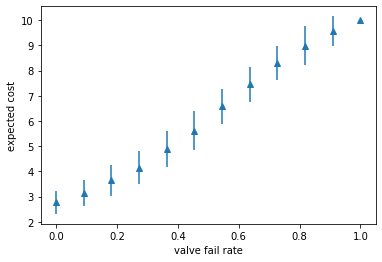

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.errorbar(fail_rates, mean_costs, std_costs, linestyle='None', marker='^')
plt.xlabel('valve fail rate')
plt.ylabel('expected cost')
plt.show()

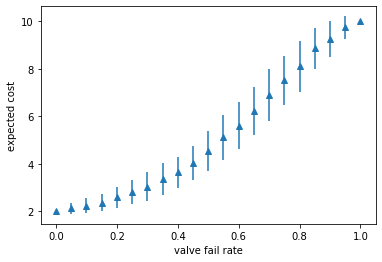

In [787]:
import matplotlib.pyplot as plt
import numpy as np

plt.errorbar(fail_rates, mean_costs, std_costs, linestyle='None', marker='^')
plt.xlabel('valve fail rate')
plt.ylabel('expected cost')
plt.show()

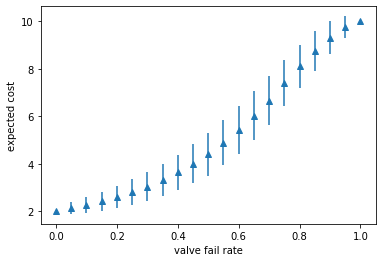

In [793]:
import matplotlib.pyplot as plt
import numpy as np

plt.errorbar(fail_rates, mean_costs, std_costs, linestyle='None', marker='^')
plt.xlabel('valve fail rate')
plt.ylabel('expected cost')
plt.show()

In [14]:
N1 = False # N-1 valving strategy 
vstate = create_valvestates(sample_lid2nid,N1)
segnet = SegmentNet(vstate,src_nids)

NameError: name 'sample_lid2nid' is not defined

In [747]:

# for seg in segnet.segments:
#     print (seg)
# print(segnet.seg_adj_mtx)

segment with sid 0, contains nid [0] and pid [], risk 0.000000, direct_cost 0.000000, unintend_cost 10  
segment with sid 1, contains nid [1] and pid [], risk 0.000000, direct_cost 0.000000, unintend_cost 9  
segment with sid 2, contains nid [2] and pid [], risk 0.000000, direct_cost 0.000000, unintend_cost 0  
segment with sid 3, contains nid [3] and pid [], risk 0.000000, direct_cost 0.000000, unintend_cost 0  
segment with sid 4, contains nid [4] and pid [], risk 0.000000, direct_cost 0.000000, unintend_cost 0  
segment with sid 5, contains nid [5] and pid [], risk 0.000000, direct_cost 0.000000, unintend_cost 3  
segment with sid 6, contains nid [6] and pid [], risk 0.000000, direct_cost 0.000000, unintend_cost 1  
segment with sid 7, contains nid [7] and pid [], risk 0.000000, direct_cost 0.000000, unintend_cost 0  
segment with sid 8, contains nid [8] and pid [], risk 0.000000, direct_cost 0.000000, unintend_cost 0  
segment with sid 9, contains nid [] and pid [0], risk 0.100000,

In [748]:
num_valves = len(vstate.normal_valves)
num_valves

20

In [22]:
inp_graph.lid2npair

{0: (1, 2),
 1: (2, 0),
 2: (3, 4),
 3: (5, 6),
 4: (6, 7),
 5: (7, 8),
 6: (8, 9),
 7: (3, 10),
 8: (4, 11),
 9: (11, 12),
 10: (1, 13),
 11: (13, 14),
 12: (14, 15),
 13: (15, 16),
 14: (17, 18),
 15: (19, 18),
 16: (18, 16),
 17: (16, 20),
 18: (20, 21),
 19: (21, 22),
 20: (20, 23),
 21: (23, 24),
 22: (25, 26),
 23: (27, 22),
 24: (9, 28),
 25: (29, 28),
 26: (30, 29),
 27: (30, 31),
 28: (31, 19),
 29: (19, 32),
 30: (33, 34),
 31: (12, 27),
 32: (4, 5),
 33: (35, 25),
 34: (36, 37),
 35: (38, 39),
 36: (40, 33),
 37: (41, 42),
 38: (43, 44),
 39: (45, 46),
 40: (47, 48),
 41: (49, 50),
 42: (51, 12),
 43: (52, 53),
 44: (54, 44),
 45: (41, 55),
 46: (36, 56),
 47: (30, 57),
 48: (57, 58),
 49: (28, 59),
 50: (59, 60),
 51: (7, 61),
 52: (5, 62),
 53: (49, 63),
 54: (50, 64),
 55: (65, 66),
 56: (67, 68),
 57: (69, 70),
 58: (69, 71),
 59: (67, 72),
 60: (73, 74),
 61: (75, 76),
 62: (73, 77),
 63: (74, 78),
 64: (79, 1),
 65: (79, 80),
 66: (81, 82),
 67: (83, 84),
 68: (85, 86)

In [23]:
pool = mp.Pool(mp.cpu_count()-1)
results = pool.starmap(simulate_vfail, [(inp_graph.lid2npair,src_nids,N1) for _ in range(100)])
pool.close()
    

Process ForkPoolWorker-17:
Process ForkPoolWorker-20:
Process ForkPoolWorker-28:
Process ForkPoolWorker-18:
Process ForkPoolWorker-30:
Process ForkPoolWorker-19:
Process ForkPoolWorker-24:
Process ForkPoolWorker-26:
Process ForkPoolWorker-27:
Process ForkPoolWorker-25:
Process ForkPoolWorker-21:
Process ForkPoolWorker-22:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-16:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/rewu/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/rewu/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File 

  File "<ipython-input-9-f80451a4cf17>", line 113, in valve_fail
    failed_valve = self.vstates.fail_valves(1)[0]
  File "<ipython-input-4-baee4c31f282>", line 46, in fail_valves
    self.prev_state = copy.deepcopy(self)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "<ipython-input-4-baee4c31f282>", line 46, in fail_valves
    self.prev_state = copy.deepcopy(self)
  File "<ipython-input-4-baee4c31f282>", line 46, in fail_valves
    self.prev_state = copy.deepcopy(self)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)


KeyboardInterrupt: 

  File "<ipython-input-10-dcd1723d2353>", line 6, in simulate_vfail
    segnet.valve_fail()
  File "<ipython-input-10-dcd1723d2353>", line 6, in simulate_vfail
    segnet.valve_fail()
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/multiprocessing/pool.py", line 47, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "<ipython-input-9-f80451a4cf17>", line 113, in valve_fail
    failed_valve = self.vstates.fail_valves(1)[0]
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "<ipython-input-9-f80451a4cf17>", line 113, in valve_fail
    failed_valve = self.vstates.fail_valves(1)[0]
  File "

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "<ipython-input-4-baee4c31f282>", line 46, in fail_valves
    self.prev_state = copy.deepcopy(self)
  File "<ipython-input-4-baee4c31f282>", line 46, in fail_valves
    self.prev_state = copy.deepcopy(self)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/multiprocessing/pool.py", line 47, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y 

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "<ipython-input-9-f80451a4cf17>", line 113, in valve_fail
    failed_valve = self.vstates.fail_valves(1)[0]
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dic

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, me

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state,

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepco

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _dee

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, me

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y 

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File 

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deep

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, me

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcop

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180,

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
KeyboardInterrupt
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _r

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
   

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/hom

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, me

KeyboardInterrupt
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/c

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
KeyboardInterrupt
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 24

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
 

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py"

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deep

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
   

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    s

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File 

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = d

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepco

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deep

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepc

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deep

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = d

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
  

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/r

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstru

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
 

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File 

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _recons

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
 

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
   

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _recons

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
   

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(sta

  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 180, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 150, in deepcopy
    y = copier(x, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 240, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rewu/anaconda3/lib/python3.7/copy.py", line 280, in _reconstruct
    state = d

In [18]:
def simulate_vfail(lid2nid,src_nids,N1 = False):
    vstate = create_valvestates(lid2nid,N1)
    segnet = SegmentNet(vstate,src_nids)
    num_valves = len(vstate.normal_valves)
    for i in range(num_valves):
#         print (i)
        segnet.valve_fail()
    return segnet.exp_costs
    

In [29]:
src_nids = [0]
N1 = True

mc_num = 1000


In [30]:
import multiprocessing as mp

pool = mp.Pool(mp.cpu_count()-1)
results = pool.starmap(simulate_vfail, [(inp_graph.lid2npair,src_nids,N1) for _ in range(mc_num)])
pool.close()
    

In [31]:
len(results[0])

430

In [34]:
num_valves = 429
fail_rates = np.linspace(0,1,num_valves+1)

mc_results = np.zeros((mc_num,len(fail_rates)))
for i,result in enumerate(results):
    mc_results[i,:] = result

mean_costs = np.mean(mc_results,axis=0)
std_costs = np.std(mc_results,axis=0)

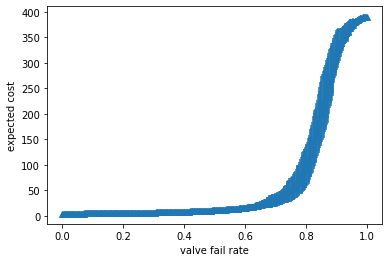

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.errorbar(fail_rates, mean_costs, std_costs, linestyle='None', marker='^')
plt.xlabel('valve fail rate')
plt.ylabel('expected cost')
plt.show()

In [ ]:
plt.errorbar(fail_rates, mean_costs, std_costs, linestyle='None', marker='^')
plt.xlabel('valve fail rate')
plt.ylabel('expected cost')
plt.show()

In [31]:
results[-1]

[4.378516624040945,
 4.383631713555013,
 4.391304347826111,
 4.396419437340176,
 4.398976982097211,
 4.409207161125345,
 4.411764705882377,
 4.416879795396445,
 4.421994884910511,
 4.427109974424577,
 4.432225063938643,
 4.43734015345271,
 4.442455242966775,
 4.447570332480842,
 4.450127877237875,
 4.455242966751941,
 4.4654731457800745,
 4.468030690537107,
 4.47058823529414,
 4.475703324808207,
 4.480818414322273,
 4.491048593350407,
 4.498721227621505,
 4.503836317135572,
 4.508951406649637,
 4.5140664961637045,
 4.529411764705902,
 4.534526854219968,
 4.539641943734034,
 4.5524296675192,
 4.5575447570332654,
 4.5652173913043645,
 4.570332480818431,
 4.580562659846564,
 4.588235294117663,
 4.593350383631728,
 4.598465473145794,
 4.624040920716126,
 4.6317135549872255,
 4.6393861892583255,
 4.644501278772393,
 4.657289002557559,
 4.6675191815856945,
 4.67263427109976,
 4.677749360613825,
 4.682864450127891,
 4.695652173913056,
 4.700767263427122,
 4.703324808184155,
 4.710997442455256

In [33]:
def simulate_save_vfail(lid2nid,src_nids,save_folder, save_interval, N1 = False):
    vstate = create_valvestates(lid2nid,N1)
    segnet = SegmentNet(vstate,src_nids)
    num_valves = len(vstate.normal_valves)
    for i in range(num_valves):
        segnet.valve_fail()
    return segnet.exp_costs
    

(1000, 430)

In [ ]:
import geopandas as gpd
pipe_data = gpd.read_file('/home/rewu/Documents/research/bay_pipes/data/processed_data/communities/partial_pipes.geojson')

dfs = []
save_folder = '/home/rewu/Documents/research/bay_pipes/data/processed_data/communities/segment_results/'
for _ in range(20):
    vstates.fail_valves(0.1)
    seg_sum = generate_seg_sum(vstates)
    df_segment = create_segment_gjson(seg_sum,pipe_data)
    
    fail_rate = round(vstates.fail_rate,2)
    df_segment.to_file(save_folder+f"partial_segment_{fail_rate}.geojson", driver="GeoJSON")
    uniq_sids = set(df_segment['sid'])
    print (fail_rate,len(df_segment),len(uniq_sids))